# Predicción de precipitaciones en las próximas 24 hs con árboles de decisión.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#Leemos el dataset con datos meteorológicos de Australia. La variable objetivo será RainTomorrow.
df = pd.read_csv('weatherAUS.zip')
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [32]:
# Preprocesamiento

df = df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)
df = df.dropna()
df = pd.get_dummies(df, columns=['RainToday', 'RainTomorrow'], drop_first=True)

In [33]:
# Defino las features y variable objetivo con los que voy a trabajar

X = df[['MinTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed3pm', 'Humidity3pm',
       'Pressure3pm', 'Temp3pm', 'RainToday_Yes']]
y = df["RainTomorrow_Yes"]

In [34]:
# Defino los set de datos de train y de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=78)

In [35]:
from sklearn import tree

clasif_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth = 4, min_samples_leaf = 2)
clasif_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [36]:
from sklearn.metrics import accuracy_score

tree_pred = clasif_tree.predict(X_test)
score = accuracy_score(y_test, tree_pred)
score

0.8397208841031454

Text(0.5, 15.0, 'Etiquetas predichas')

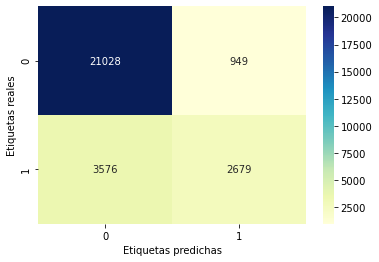

In [37]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, fmt='.0f', cmap='YlGnBu')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

In [38]:
cm = confusion_matrix(y_test, tree_pred)

In [39]:
TP = cm[1, 1]; TN = cm[0, 0] ; FP = cm[0, 1] ; FN = cm[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

TP:  2679  TN:  21028  FP:  949  FN:  3576


In [40]:
# Calculamos el recall

print('Recall=', (TP)/ (TP+FN))
print('Total de casos positivos predichos correctamente (TP) =',(TP))
print('Total de casos positivos reales (TP+FN) =',(TP+FN))

Recall= 0.4282973621103118
Total de casos positivos predichos correctamente (TP) = 2679
Total de casos positivos reales (TP+FN) = 6255


In [41]:
# Calculamos la precision

from sklearn.metrics import precision_score
print(precision_score(y_test, tree_pred))

0.7384233737596472


In [42]:
# Calculemos la metrica F1

from sklearn.metrics import f1_score

print(f1_score(y_test, tree_pred))

0.5421430739653951


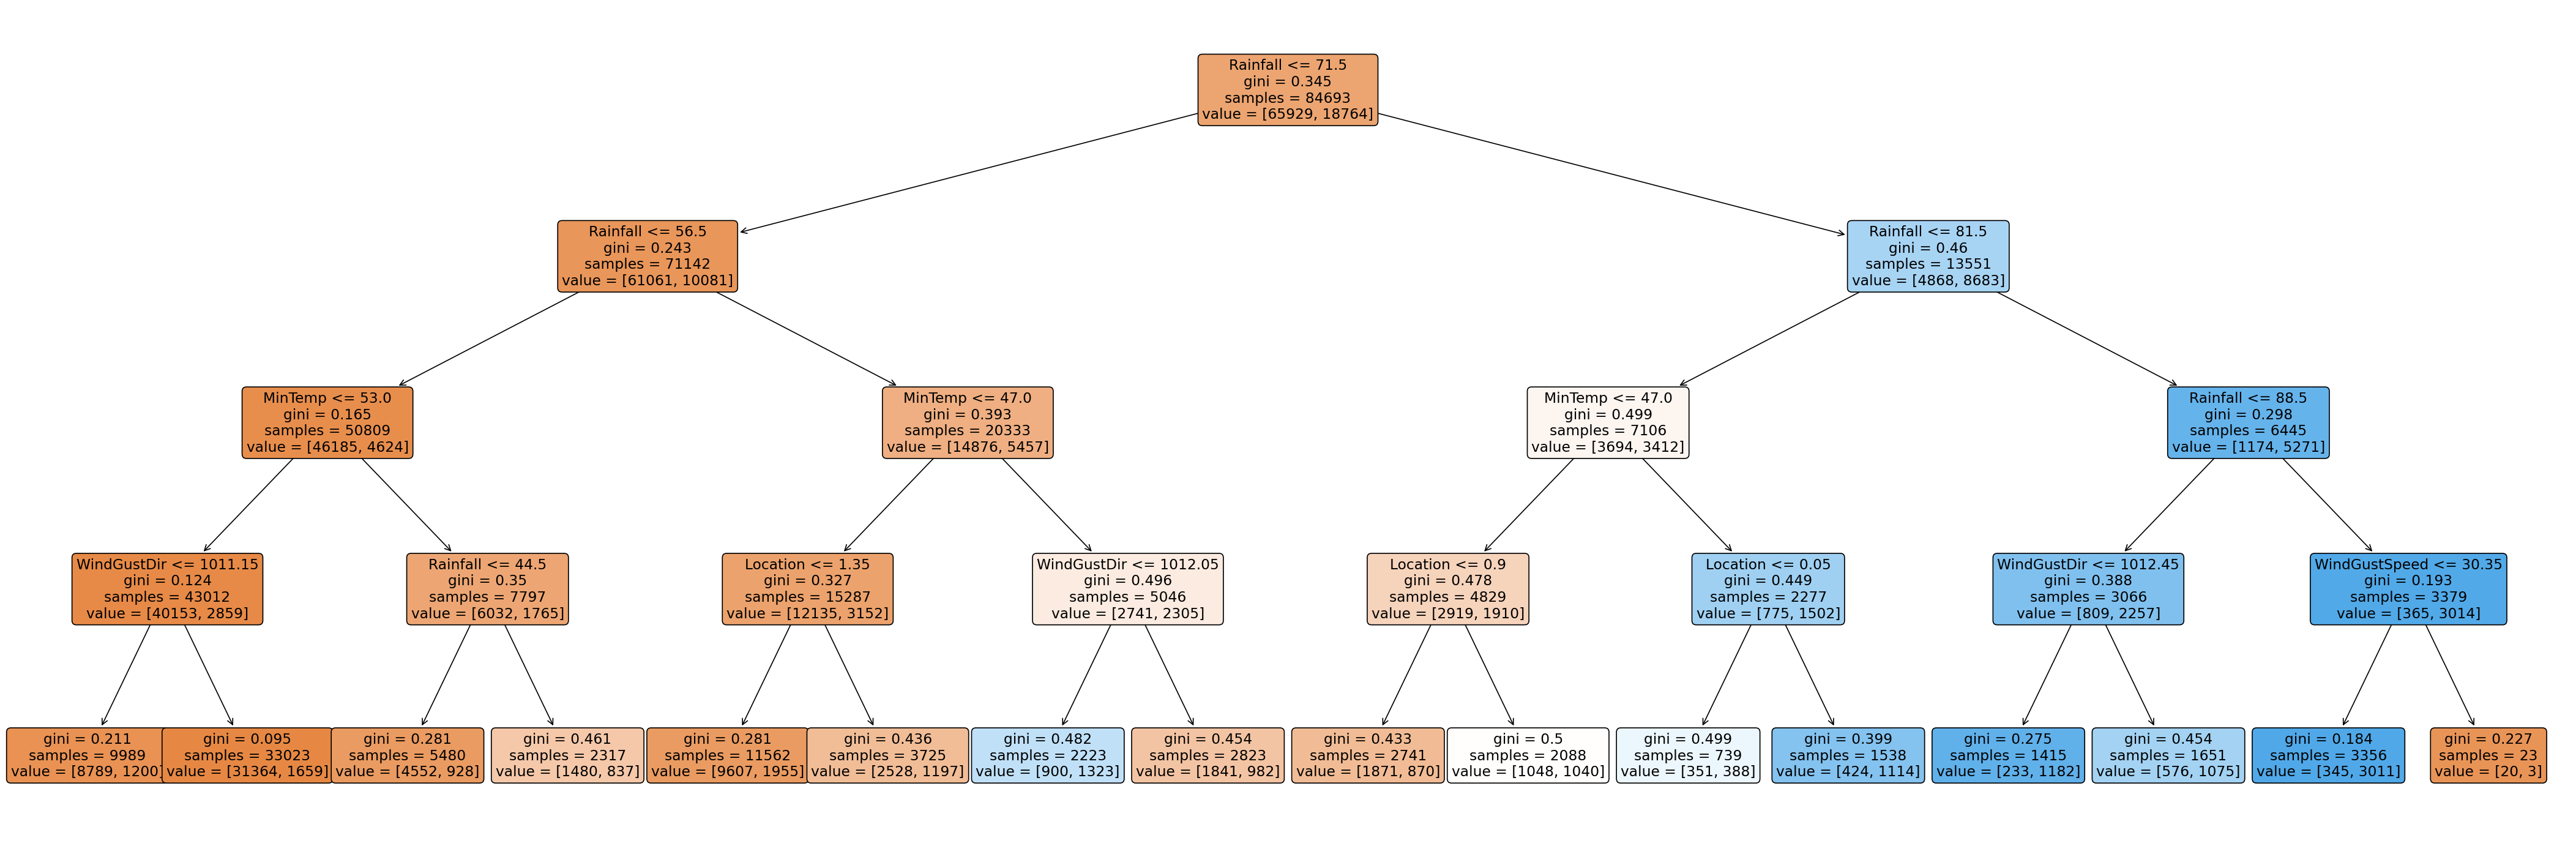

In [77]:
# Graficamos el árbol obtenido para ver su forma

plt.figure(figsize=(45,15), dpi= 120)
tree.plot_tree(clasif_tree, feature_names=df.columns[:-1], filled=True, rounded=True, fontsize=14)

print()